In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [4]:
data=pd.read_csv('data.csv')
data.drop(['id'],axis=1)
y=data.iloc[:,1]
x=data.iloc[:,2:-1]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU

In [9]:
clf = Sequential()

In [10]:
clf.add(Dense(units=9,kernel_initializer='he_uniform',activation='leaky_relu',input_dim=30))
clf.add(Dense(units=9,kernel_initializer='he_uniform',activation='leaky_relu'))
clf.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [11]:
clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 279       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [12]:
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model = clf.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 6ms/step - loss: 0.8842 - accuracy: 0.4070
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7783 - accuracy: 0.5226
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.6106
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6110 - accuracy: 0.6910
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.7487
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4968 - accuracy: 0.7864
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4545 - accuracy: 0.8166
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4195 - accuracy: 0.8442
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.8618
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3658 - accuracy: 0.8693
Epoch 11/100
4/4 [===========

In [16]:
y_pred = clf.predict(x_test)

In [17]:
y_pred = (y_pred>0.5)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)

[[102   6]
 [  2  61]]
score is: 0.9532163742690059


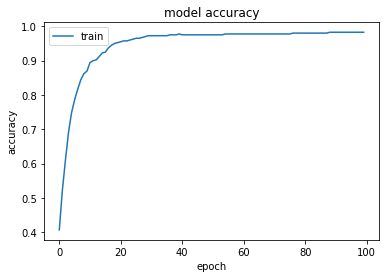

In [19]:
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

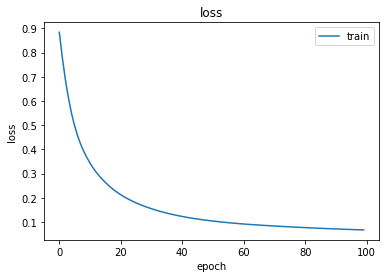

In [20]:
plt.plot(model.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()